In [135]:
#for running on colab
#!wget https://raw.githubusercontent.com/HealthINCITE/supervised-cadres/travis/notebooks/DGen.py && git clone https://github.com/newalexander/supervised-cadres

'wget' is not recognized as an internal or external command,
operable program or batch file.


This notebook has three main objectives:
1. First we generate synthetic data using the `DGen` module 
2. Second, we replicate the SCM from the `binaryClassification2.py` module
3. Finally, we test the results from step 2, using regular Logistic Regression (since the target is binary)

**Import Modules**

In [1]:
from  sklearn.datasets import make_regression
import pandas as pd    
import numpy as np
from DGen import DGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import importlib
import DGen
importlib.reload(DGen)

<module 'DGen' from 'C:\\Users\\kofi_\\Documents\\GitHub\\supervised-cadres\\notebooks\\DGen.py'>

In [3]:
# imports from binary example 2
import sys
from scipy.stats import zscore, zmap
from sklearn.model_selection import train_test_split, KFold
from itertools import product
from joblib import Parallel, delayed
from multiprocessing import cpu_count

In [4]:
sys.path.insert(0, '../cadreModels/')
from classificationBinary2 import binaryCadreModel

**Generate Cadres and Cadre Features**

In [5]:
c_samples = 10000
c_features = 10
c_informative = 5
c_cadres = 5
c_seed = 101
c_red = 0
c_classep = 4
c_flip = 0

In [6]:
df_cadre = DGen.DGenerator.generate_cadres(samples = c_samples, features = c_features, informative = c_informative, cadres = c_cadres, seed = c_seed, redundant = c_red, classep = c_classep, flip = c_flip)
df_cadre.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,cadre,index_c
0,-0.469093,7.567745,-1.762847,0.133769,0.956646,3.917727,-3.559154,0.949046,1.341543,2.542744,0,0
1,-0.061138,3.530291,-4.107550,1.723133,-0.600456,3.345649,-3.969014,1.301195,-1.139559,3.377601,0,1
2,-1.378483,2.199072,-6.393677,-0.469223,-0.296356,3.423886,-4.231474,1.218804,-0.464441,4.035942,0,2
3,0.660545,-3.506277,3.954696,-1.171736,-0.278800,2.426672,-1.628396,0.030729,-1.240098,6.328232,0,3
4,-0.762996,-5.142431,4.279181,0.667524,0.123531,5.446941,-4.315281,0.339328,0.045586,4.716531,0,4


**Generate Features and DVs**

In [80]:
t_cadres = 5
t_samples = int(c_samples/t_cadres)
t_features = 5
t_classes = 2
t_informative = 5
t_seed = 101
t_red = 0
t_classep = 6
t_flip = 0

In [81]:
df_variables = DGenerator.generate_variables(cadres = t_cadres, samples = t_samples, features = t_features, classes = t_classes, informative = t_informative, seed = t_seed, redundant = t_red, classep = t_classep, flip = t_flip)
df_variables.head()

,dv0,dv1,dv2,dv3,dv4,target,cadre,index_c
0,7.433898,-6.165651,-3.838441,6.323716,-5.696206,0,0,0
1,-5.132010,-5.423612,7.650038,4.558001,6.166987,1,0,1
2,-5.556806,-5.454604,4.604269,6.764353,5.305944,1,0,2
3,5.563300,5.086025,-5.559214,6.610818,-6.497687,0,0,3
4,-4.377710,-3.343118,4.032863,8.781275,5.574705,1,0,4


In [104]:
z = pd.merge(df_cadre, df_variables)
z.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,cadre,index_c,dv0,dv1,dv2,dv3,dv4,target
0,-0.469093,7.567745,-1.762847,0.133769,0.956646,3.917727,-3.559154,0.949046,1.341543,2.542744,0,0,7.433898,-6.165651,-3.838441,6.323716,-5.696206,0
1,-0.065857,-3.546688,3.468315,-0.264185,0.207933,3.340381,-4.200437,-0.619582,-0.157319,3.725026,0,0,7.433898,-6.165651,-3.838441,6.323716,-5.696206,0
2,-0.061138,3.530291,-4.107550,1.723133,-0.600456,3.345649,-3.969014,1.301195,-1.139559,3.377601,0,1,-5.132010,-5.423612,7.650038,4.558001,6.166987,1
3,-1.378483,2.199072,-6.393677,-0.469223,-0.296356,3.423886,-4.231474,1.218804,-0.464441,4.035942,0,2,-5.556806,-5.454604,4.604269,6.764353,5.305944,1
4,0.660545,-3.506277,3.954696,-1.171736,-0.278800,2.426672,-1.628396,0.030729,-1.240098,6.328232,0,3,5.563300,5.086025,-5.559214,6.610818,-6.497687,0


In [130]:
# import Logistic Regression Module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()

#Test Cadre
for t in range(t_cadres):

    y_cadre = z['target']
    print("regression for cadre ", t)

    # Drop row/observation from dataset if cadre is not == 0
    cadre = z[z.cadre == t] 

    # Select X features for cadre 0
    X_cadre = cadre.drop(['cadre', 'index_c', 'target'], axis=1) 
    print (X_cadre.shape)
    # Select y features for cadre 0
    y_cadre = cadre['target'] 

    # Run logistic regression
    X_train, X_test, y_train, y_test = train_test_split(X_cadre, y_cadre, test_size=0.2, random_state=101)
    fit = lr.fit(X_train, y_train)

    #test accuracy of predictions
    y_train_pred = fit.predict(X_train)
    y_test_pred = fit.predict(X_test)
    print("cadre", t, "train", classification_report(y_train, y_train_pred))
    print(classification_report(y_test, y_test_pred))
    print (X_train.shape)
    
  

regression for cadre  0
(2001, 15)
cadre 0 train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       793
           1       1.00      1.00      1.00       807

   micro avg       1.00      1.00      1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       193

   micro avg       1.00      1.00      1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

(1600, 15)
regression for cadre  1
(2001, 15)
cadre 1 train               precision    recall  f1-score   support

           0       1.00      1.00      1.00       796
           1       1.00      1.00      1.00       804

   micro avg       1.00      1.00      1.00      1600
   macro avg       

**Begin SCM**

In [131]:
data = z.drop(['cadre','index_c'], 1)
data.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,dv0,dv1,dv2,dv3,dv4,target
0,-0.469093,7.567745,-1.762847,0.133769,0.956646,3.917727,-3.559154,0.949046,1.341543,2.542744,7.433898,-6.165651,-3.838441,6.323716,-5.696206,0
1,-0.065857,-3.546688,3.468315,-0.264185,0.207933,3.340381,-4.200437,-0.619582,-0.157319,3.725026,7.433898,-6.165651,-3.838441,6.323716,-5.696206,0
2,-0.061138,3.530291,-4.107550,1.723133,-0.600456,3.345649,-3.969014,1.301195,-1.139559,3.377601,-5.132010,-5.423612,7.650038,4.558001,6.166987,1
3,-1.378483,2.199072,-6.393677,-0.469223,-0.296356,3.423886,-4.231474,1.218804,-0.464441,4.035942,-5.556806,-5.454604,4.604269,6.764353,5.305944,1
4,0.660545,-3.506277,3.954696,-1.171736,-0.278800,2.426672,-1.628396,0.030729,-1.240098,6.328232,5.563300,5.086025,-5.559214,6.610818,-6.497687,0


Alex performs randomized train-test split

In [132]:
Dtr, Dva = train_test_split(data, test_size=0.2, random_state=101)

Separate cadre prediction features from target prediction features (optional)

In [133]:
cadreFts = data.columns[data.columns.str.contains('cad')]
predictFts = data.columns[data.columns.str.contains('dv')]

In [134]:
print(cadreFts)

Index(['cad0', 'cad1', 'cad2', 'cad3', 'cad4', 'cad5', 'cad6', 'cad7', 'cad8',
       'cad9'],
      dtype='object')


In [135]:
print(predictFts)

Index(['dv0', 'dv1', 'dv2', 'dv3', 'dv4'], dtype='object')


In [136]:
features = cadreFts.union(predictFts)

Standardize training and validation sets

In [137]:
Dva[features] = zmap(Dva[features].values, Dtr[features].values)
Dtr[features] = zscore(Dtr[features].values)

In [138]:
Dva.head()

,cad0,cad1,cad2,cad3,cad4,cad5,cad6,cad7,cad8,cad9,dv0,dv1,dv2,dv3,dv4,target
6676,0.122512,-1.207513,1.143731,-0.856875,0.518762,0.674137,0.866234,1.217003,0.535757,-0.075601,-1.146091,-0.710645,-0.989583,0.838544,0.667412,1
6421,-0.337137,-0.330253,0.817597,-0.804606,-0.082559,-0.987700,1.069227,0.194300,-1.171890,-0.883354,1.289751,-0.831717,-0.477241,0.698828,-1.139992,1
9834,-0.200930,-0.853107,-0.491826,-0.194173,-0.946644,-0.194386,-0.337862,-0.359469,-0.988533,-0.045381,0.466151,-0.706945,1.067010,0.980788,0.739382,0
8492,1.274049,1.213090,0.680294,0.843575,1.225789,0.992843,-1.183020,0.707878,0.009384,-1.150283,-1.349434,-0.589118,-0.963983,-1.169730,-1.065728,1
9982,0.583916,-0.646165,-0.096330,0.506997,-1.746399,-0.449424,-0.830589,-0.681874,-0.774733,-0.418637,1.041328,1.080009,-0.856717,-1.365094,0.790838,1


Define and train SCM model object. We're not going to tune any hyperparameters here. Note that we now supply the binaryCadreModel object with the cadre-assignment features and target-prediction features, as well as the name of the target feature.

If we did not supply any cadreFts or targetFts, they default to being every column in data other than targetCol

In [142]:
scm = binaryCadreModel(M=5, Tmax=101, record=10)
scm.fit(data=Dtr,
       targetCol='target',
       cadreFts=cadreFts,
       predictFts=predictFts,
       dataVa=Dva,
       progress=True)

0
10 0.817103 0.505375 0.8145021 0.527 0.3567969799041748
20 0.810394 0.518 0.80816454 0.535 1.2772696018218994
30 0.806893 0.52525 0.8048242 0.539 2.0588228702545166
40 0.804216 0.529875 0.8022242 0.544 2.8413753509521484
50 0.8020493 0.536375 0.800121 0.5465 3.6169326305389404
60 0.8001258 0.538375 0.79826427 0.548 4.385493516921997
70 0.7984635 0.541375 0.7966625 0.5515 5.158053398132324
80 0.79692274 0.544875 0.7951586 0.5505 5.936608076095581
90 0.7954911 0.547125 0.79377025 0.554 6.709166526794434
100 0.7941922 0.549125 0.79250747 0.5565 7.482723951339722


The metrics attribute of scm contains training and validation metrics values. We can plot them separately. ROC_AUC is the receiver operator characteristic area under the curve (sklearn.metrics.roc_auc_score). PR_AUC is the average precision, i.e., area under the precision-recall curve (sklearn.metrics.average_precision_score).

The x-axis in these plots dependent on iteration count.

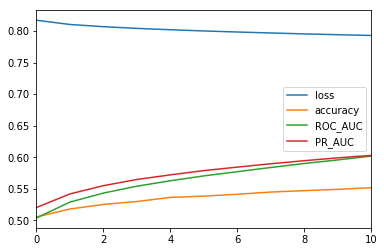

In [143]:
scm.metrics['training'].plot()

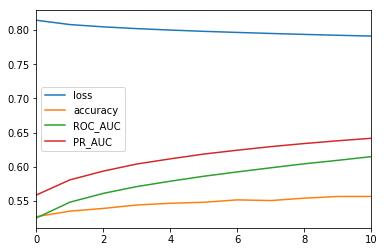

In [144]:
scm.metrics['validation'].plot()

Model parameters are stored as pd.DataFrame objects.

In [145]:
scm.W

,0,1,2,3,4
dv0,0.149657,0.130046,0.125266,0.042374,-0.047480
dv1,-0.076101,-0.148999,-0.103468,-0.000253,-0.000394
dv2,-0.066784,0.010188,0.044432,-0.030152,0.096478
dv3,0.045051,-0.098693,-0.104450,-0.107904,-0.001840
dv4,0.269066,-0.006205,-0.013232,0.109738,0.103667


In [146]:
scm.C

,0,1,2,3,4
cad0,-0.133720,0.089640,-0.001635,0.050341,-0.040753
cad1,-0.078977,-0.030039,-0.040241,0.131008,-0.045167
cad2,-0.070759,-0.091257,0.213656,0.253277,0.144105
cad3,0.225222,0.085464,-0.020204,0.029201,0.076185
cad4,-0.093777,0.000906,-0.052809,-0.069387,-0.059523
cad5,0.038482,-0.091332,0.060749,0.074074,-0.048908
cad6,0.160397,-0.007160,0.034112,0.061898,-0.058451
cad7,0.143048,-0.228170,0.030702,0.022472,-0.113767
cad8,-0.025181,-0.040261,-0.039196,0.119213,0.077434
cad9,-0.073399,-0.168941,-0.024567,0.011361,0.086453


In [147]:
scm.proportions.head()

,0,1,2,3,4
0,0.198500,0.216625,0.339250,0.170125,0.075500
1,0.205375,0.212625,0.322125,0.171000,0.088875
2,0.209375,0.211250,0.310000,0.172875,0.096500
3,0.210875,0.211000,0.302625,0.174125,0.101375
4,0.211500,0.211750,0.299375,0.175625,0.101750


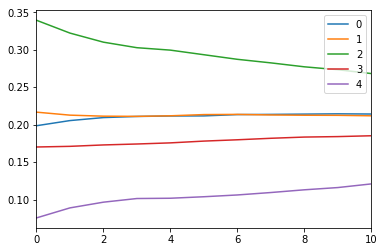

In [148]:
scm.proportions.plot()

Cadre 3 (red) is the largest cadre and contains around 33% of the training data. Cadre 4 (purple) is the smallest. In Alex's code, one cadre disappears halfway through the training process

In [149]:
margin, label, cadre_weight, cadre, loss = scm.predictFull(Dva)

The predictFull method now also calculates the loss value for the supplied data as the last argument.

In [150]:
scm.scoreMetrics(Dva)

,loss,accuracy,ROC_AUC,PR_AUC
0,0.735598,0.5565,0.614791,0.641697


**Logistic Regression**

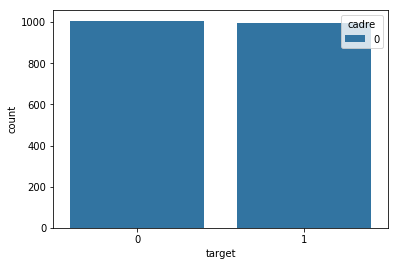

In [145]:
sns.countplot(x='target',data=z, hue='cadre')

Exploratory  - plot histogram to understand distribution of cadres with respect to target

In [126]:
# import Logistic Regression Module
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()

Set up dataframe for X features and y features:
1. Note that we separate target prediction features from cadre prediction features
2. Due to the above, we perform a binomial logistic regression for the target using only the target prediction features (dv0 - dv4)
3. We use the sklearn logistic regression model since the SCM does training and testing as well

Logistic Regression (using target prediction features) for entire dataset irrespective of cadre

In [157]:
X = data.drop(['target'], 1)
y = data['target']

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
result = lr.fit(X_train, y_train)

#display coefficients
result.coef_

array([[ 2.14724246e-02, -5.37560412e-02, -3.61845614e-02,
        -5.04303888e-03,  4.42016354e-03,  5.10525800e-02,
        -3.59027516e-02,  6.26902373e-05, -1.15312752e-02,
        -1.72005105e-02, -6.50080252e-02, -5.34275780e-02,
        -3.12527673e-02, -1.02125644e-02,  1.67357968e-01]])

In [158]:
pred = lr.predict(X_test)

In [159]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       966
           1       0.70      0.74      0.72      1034

   micro avg       0.70      0.70      0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



In [160]:
confusion_matrix(y_test, pred)

array([[633, 333],
       [269, 765]], dtype=int64)

Logistic Regression for cadre 0

In [131]:
# select data for each cadre only

# Drop row/observation from dataset if cadre is not == 0
cadre0 = z[z.cadre == 0] 

# Select X features for cadre 0
cadre0X = cadre0.drop(['cadre', 'index_c', 'target','cad0','cad1','cad2','cad3','cad4','cad5','cad6','cad7','cad8','cad9'], axis=1) 

# Select y features for cadre 0
cadre0y = cadre0['target'] 

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(cadre0X, cadre0y, test_size=0.2, random_state=101)
cadre0_result = lr.fit(X_train, y_train)

cadre0r = pd.DataFrame(cadre0_result.coef_)
cadre0r = cadre0r.T #need to transpose because results appear in array form

# rename index and colum for easy identification when merged
cadre0r.rename(index = {0: "dv0", 1: "dv1", 2: "dv2", 3: "dv3", 4: "dv4"}, inplace = True)
cadre0r.rename(columns = {0: "log0"}, inplace = True)

#test accuracy of predictions
predc0 = lr.predict(X_test)
print(classification_report(y_test, predc0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       203

   micro avg       1.00      1.00      1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



Logistic Regression for cadre 1

In [132]:
# Drop row/observation from dataset if cadre is not == 1
cadre1 = z[z.cadre == 1] 

# Select X features for cadre 1
cadre1X = cadre1.drop(['cadre', 'index_c', 'target','cad0','cad1','cad2','cad3','cad4','cad5','cad6','cad7','cad8','cad9'], axis=1) 

# Select y features for cadre 1
cadre1y = cadre1['target'] 

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(cadre1X, cadre1y, test_size=0.2, random_state=101)
cadre1_result = lr.fit(X_train, y_train)

cadre1r = pd.DataFrame(cadre1_result.coef_)
cadre1r = cadre1r.T #need to transpose because results appear in array form

# rename index and colum for easy identification when merged
cadre1r.rename(index = {0: "dv0", 1: "dv1", 2: "dv2", 3: "dv3", 4: "dv4"}, inplace = True)
cadre1r.rename(columns = {0: "log1"}, inplace = True)

#test accuracy of predictions
predc1 = lr.predict(X_test)
print(classification_report(y_test, predc1))

ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required.

Logistic Regression for cadre 2

In [ ]:
# Drop row/observation from dataset if cadre is not == 2
cadre2 = z[z.cadre == 2] 

# Select X features for cadre 2
cadre2X = cadre2.drop(['cadre', 'index_c', 'target','cad0','cad1','cad2','cad3','cad4','cad5','cad6','cad7','cad8','cad9'], axis=1) 

# Select y features for cadre 2
cadre2y = cadre2['target'] 

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(cadre2X, cadre2y, test_size=0.2, random_state=101)
cadre2_result = lr.fit(X_train, y_train)

cadre2r = pd.DataFrame(cadre2_result.coef_)
cadre2r = cadre2r.T #need to transpose because results appear in array form

# rename index and colum for easy identification when merged
cadre2r.rename(index = {0: "dv0", 1: "dv1", 2: "dv2", 3: "dv3", 4: "dv4"}, inplace = True)
cadre2r.rename(columns = {0: "log2"}, inplace = True)

#test accuracy of predictions
predc2 = lr.predict(X_test)
print(classification_report(y_test, predc2))

Logistic Regression for cadre 3

In [ ]:
# Drop row/observation from dataset if cadre is not == 3
cadre3 = z[z.cadre == 3] 

# Select X features for cadre 3
cadre3X = cadre3.drop(['cadre', 'index_c', 'target','cad0','cad1','cad2','cad3','cad4','cad5','cad6','cad7','cad8','cad9'], axis=1) 

# Select y features for cadre 3
cadre3y = cadre3['target'] 

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(cadre3X, cadre3y, test_size=0.2, random_state=101)
cadre3_result = lr.fit(X_train, y_train)

cadre3r = pd.DataFrame(cadre3_result.coef_)
cadre3r = cadre3r.T #need to transpose because results appear in array form

# rename index and colum for easy identification when merged
cadre3r.rename(index = {0: "dv0", 1: "dv1", 2: "dv2", 3: "dv3", 4: "dv4"}, inplace = True)
cadre3r.rename(columns = {0: "log3"}, inplace = True)

#test accuracy of predictions
predc3 = lr.predict(X_test)
print(classification_report(y_test, predc3))

Logistic Regression for cadre 4

In [ ]:
# Drop row/observation from dataset if cadre is not == 4
cadre4 = z[z.cadre == 4] 

# Select X features for cadre 4
cadre4X = cadre4.drop(['cadre', 'index_c', 'target','cad0','cad1','cad2','cad3','cad4','cad5','cad6','cad7','cad8','cad9'], axis=1) 

# Select y features for cadre 4
cadre4y = cadre4['target'] 

# Run logistic regression
X_train, X_test, y_train, y_test = train_test_split(cadre4X, cadre4y, test_size=0.2, random_state=101)
cadre4_result = lr.fit(X_train, y_train)

cadre4r = pd.DataFrame(cadre4_result.coef_)
cadre4r = cadre4r.T #need to transpose because results appear in array form

# rename index and colum for easy identification when merged
cadre4r.rename(index = {0: "dv0", 1: "dv1", 2: "dv2", 3: "dv3", 4: "dv4"}, inplace = True)
cadre4r.rename(columns = {0: "log4"}, inplace = True)

#test accuracy of predictions
predc4 = lr.predict(X_test)
print(classification_report(y_test, predc4))

Next, we compare the results from the regular Logit regression with the SCM

In [ ]:
# this is our result for running the SCM for our target
scm_target = pd.DataFrame(scm.W) 

# rename index and colum for easy identification when merged
scm_target.rename(columns = {0: "scm0", 1: "scm1", 2: "scm2", 3: "scm3", 4: "scm4"}, inplace = True)

scm_target 

In [ ]:
# join scm coefficients to logistic regression results for individual cadres
compare_table = pd.concat([scm_target, cadre0r, cadre1r, cadre2r, cadre3r, cadre4r], axis = 1)
compare_table

The table above compares the coefficients from teh SMC and Logit Regression. NB: Not sure what to make of this yet. Need more searching 